 ### Exploratory data analysis (EDA)

#### Import libraries

In [1]:
import dvc.api
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

#### Import required modules

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from preprocessing import Preprocess
from plotting import Plotting
from file import Myfile
import plot

Initialize modules

In [3]:
file = Myfile()
preprocess = Preprocess()
plot = Plotting()

#### Load datasets from csv files using dvc

In [76]:
# Get URL from DVC
#path_train = 'data/train_joined.csv'
#path_test = 'data/test_joined.csv'
#repo = 'https://github.com/tigisthailay/Rossmann-Pharmaceuticals-Sales-prediction'
#version = '2294ec4246e4b1ba6f692d5ad6e447ba67444e1d'

In [81]:
#load data
train_df = file.read_csv('../data/train_joined.csv')
test_df = file.read_csv('../data/test_joined.csv')

--> file read as csv
--> file read as csv


In [83]:
train_df.sort_values(["Store","Date"], ignore_index=True, inplace=True)
test_df.sort_values(["Store","Date"], ignore_index=True, inplace=True)


In [84]:
# Set date as index
train_df.set_index('Date', inplace=True)
test_df.set_index('Date', inplace=True)

Basic Dataoverview

In [85]:
report = plot.plot_profile(train_df, '../reports/train_df_profile')

#### Data overview of each dataset

In [86]:
report

In [88]:
test_df.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,weekday,weekofyear,weekend
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-01,40233,1,5,1.0,0,0,1,c,a,1270.0,...,0,NaN,NaN,NaN,2015,8,1,5,31,1
2015-08-02,39377,1,6,0.0,0,0,1,c,a,1270.0,...,0,NaN,NaN,NaN,2015,8,2,6,31,1
2015-08-03,38521,1,0,1.0,1,0,1,c,a,1270.0,...,0,NaN,NaN,NaN,2015,8,3,0,32,1
2015-08-04,37665,1,1,1.0,1,0,1,c,a,1270.0,...,0,NaN,NaN,NaN,2015,8,4,1,32,0
2015-08-05,36809,1,2,1.0,1,0,1,c,a,1270.0,...,0,NaN,NaN,NaN,2015,8,5,2,32,0


In [89]:
train_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,weekday,weekofyear,weekend
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,1,0,0,0,0,a,1,c,a,...,0,NaN,NaN,NaN,2013,1,1,1,1,0
2013-01-02,1,2,5530,668,1,0,0,1,c,a,...,0,NaN,NaN,NaN,2013,1,2,2,1,0
2013-01-03,1,3,4327,578,1,0,0,1,c,a,...,0,NaN,NaN,NaN,2013,1,3,3,1,0
2013-01-04,1,4,4486,619,1,0,0,1,c,a,...,0,NaN,NaN,NaN,2013,1,4,4,1,0
2013-01-05,1,5,4997,635,1,0,0,1,c,a,...,0,NaN,NaN,NaN,2013,1,5,5,1,1


In [90]:
test_df.shape

(41088, 22)

In [91]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41088 entries, 2015-08-01 to 2015-09-17
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Open                       41077 non-null  float64
 4   Promo                      41088 non-null  int64  
 5   StateHoliday               41088 non-null  object 
 6   SchoolHoliday              41088 non-null  int64  
 7   StoreType                  41088 non-null  object 
 8   Assortment                 41088 non-null  object 
 9   CompetitionDistance        40992 non-null  float64
 10  CompetitionOpenSinceMonth  25872 non-null  float64
 11  CompetitionOpenSinceYear   25872 non-null  float64
 12  Promo2                     41088 non-null  int64  
 13  Promo2SinceWeek            23856 non-

In [93]:
train_df.shape

(1017209, 23)

In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1014567 non-null  float64
 11  CompetitionOpenSinceMonth  693861 non-null   float64
 12  CompetitionOpenSinceYear   693861 non-null   float64
 13  Promo

There are missing values that needs to be handled

In [95]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41088 entries, 2015-08-01 to 2015-09-17
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Open                       41077 non-null  float64
 4   Promo                      41088 non-null  int64  
 5   StateHoliday               41088 non-null  object 
 6   SchoolHoliday              41088 non-null  int64  
 7   StoreType                  41088 non-null  object 
 8   Assortment                 41088 non-null  object 
 9   CompetitionDistance        40992 non-null  float64
 10  CompetitionOpenSinceMonth  25872 non-null  float64
 11  CompetitionOpenSinceYear   25872 non-null  float64
 12  Promo2                     41088 non-null  int64  
 13  Promo2SinceWeek            23856 non-

Some data are missing from the open feature in the test dataset

In [96]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,weekday,weekofyear,weekend
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,2.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,2.013832e+03,5.846762e+00,1.570279e+01,2.998341e+00,2.361551e+01,4.268444e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,7.773960e-01,3.326097e+00,8.787638e+00,1.997391e+00,1.443338e+01,4.946196e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.800000e+02,1.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,2.013000e+03,3.000000e+00,8.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00
50%,5.580000e+02,3.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,2.014000e+03,6.000000e+00,1.600000e+01,3.000000e+00,2.200000e+01,0.000000e+00
75%,8.380000e+02,5.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,2.014000e+03,8.000000e+00,2.300000e+01,5.000000e+00,3.500000e+01,1.000000e+00
max,1.115000e+03,6.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000,2.015000e+03,1.200000e+01,3.100000e+01,6.000000e+00,5.200000e+01,1.000000e+00


For some of the columns, the mean value is very different from the median (50%) value which means there is an outlier

In [97]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day', 'weekday',
       'weekofyear', 'weekend'],
      dtype='object')

In [98]:
# Only want closing price for each day 
sales = train_df[["Sales", "StoreType"]]
sales.head()

,Sales,StoreType
Date,,
2013-01-01,0,c
2013-01-02,5530,c
2013-01-03,4327,c
2013-01-04,4486,c
2013-01-05,4997,c


In [99]:
train_df.sort_index(inplace=True)

### getstart Insights

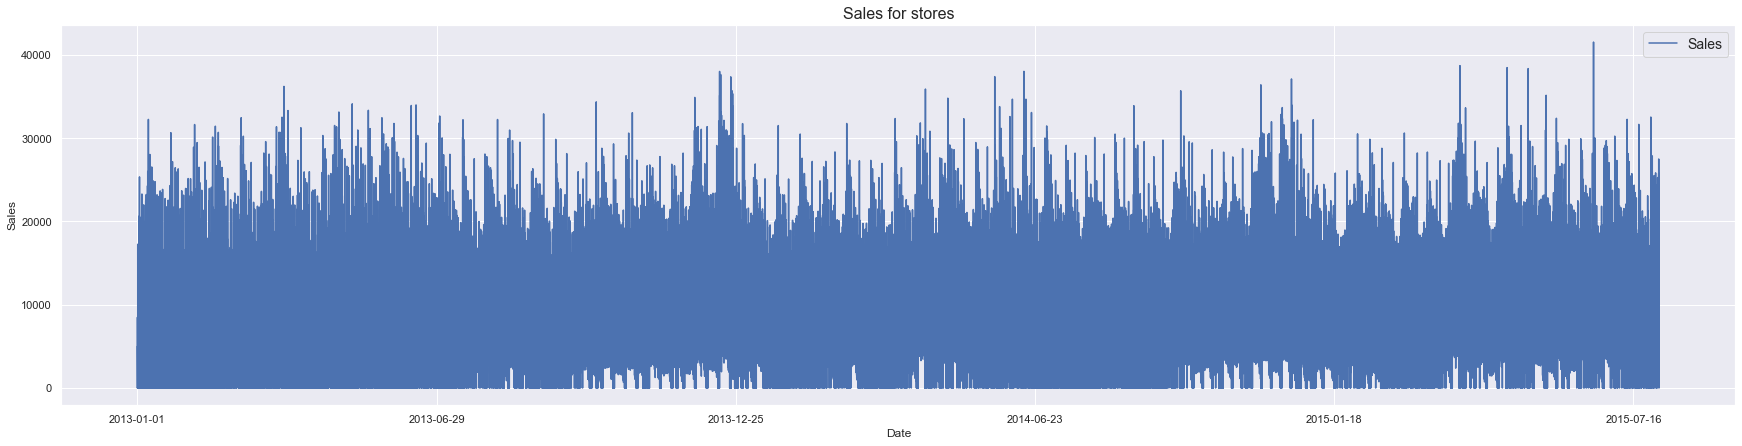

In [101]:
#visiualize the sales for  store type
sns.set()
train_df[['Sales', 'StoreType']].plot(figsize=(30, 7))
plt.ylabel("Sales")
plt.title("Sales for stores", fontsize=16)
plt.legend(fontsize=14);

##### 1.1 Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

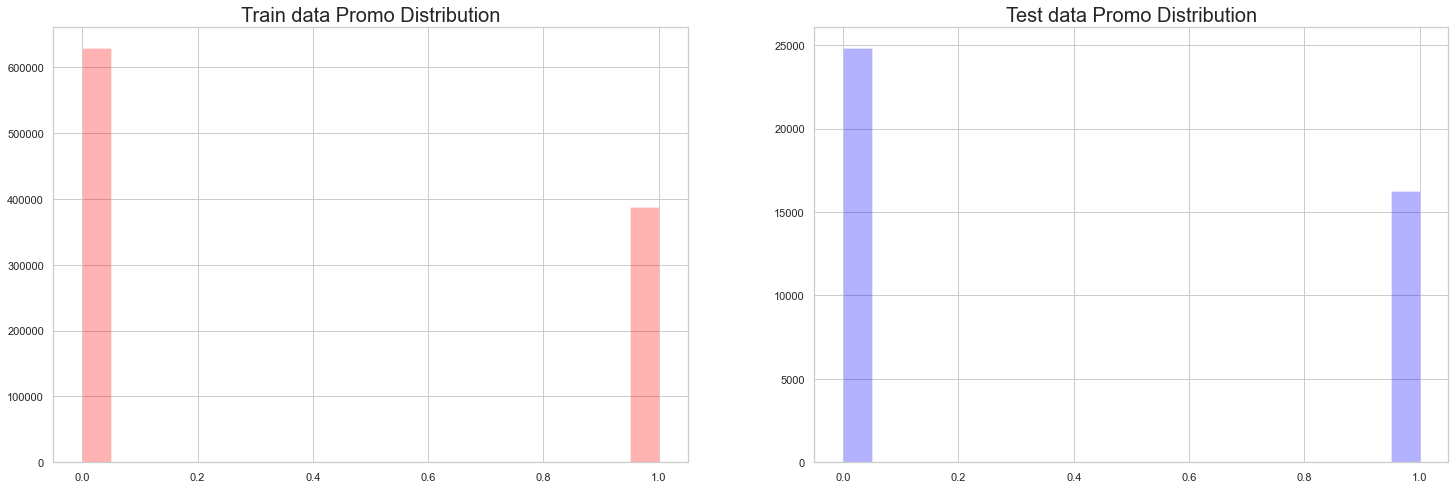

In [102]:
plot.plot_subplots(train_df['Promo'], test_df['Promo'], 'Train data Promo Distribution', 'Test data Promo Distribution')

#### SchoolHoliday distribution in both training and test sets

In [114]:
#plotting.plot_subplots(train_df['SchoolHoliday'], test_df['SchoolHoliday'], 'Train data SchoolHoliday Distribution', 'Test data SchoolHoliday Distribution')

#### 1.2 Check & compare sales behavior before, during and after holidays !!!

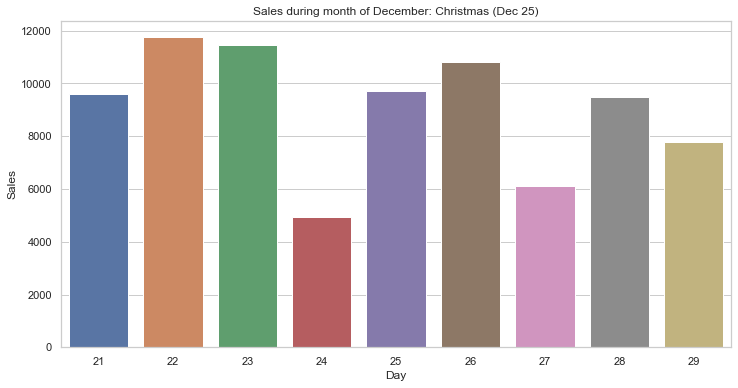

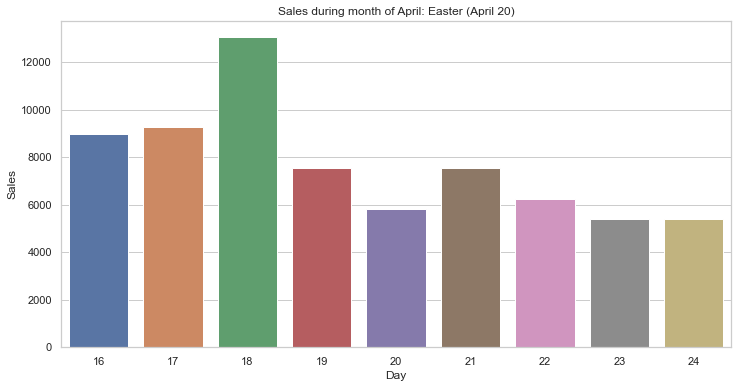

In [111]:
open_store = train_df[(train_df.Open == 1) & (train_df.Year == 2014)]

christmass_month = 12
eastern_month = 4

christmass_month = open_store[open_store.Month == christmass_month]
eastern_month = open_store[open_store.Month == eastern_month]

around_christmas = christmass_month[(christmass_month['Day'] > 20) & (christmass_month['Day'] < 30)]
around_christmas = around_christmas[['Day', 'Sales']].groupby('Day').mean()


around_eastern = eastern_month[(eastern_month['Day'] > 15) & (eastern_month['Day'] < 25)]
around_eastern = around_eastern[['Day', 'Sales']].groupby('Day').mean()

plot.bar(around_christmas.index, around_christmas['Sales'], 'Sales during month of December: Christmas (Dec 25)')
plot.bar(around_eastern.index, around_eastern['Sales'], 'Sales during month of April: Easter (April 20)')

insights-->There were more sales before and after the Holidays, rather than on the holidays

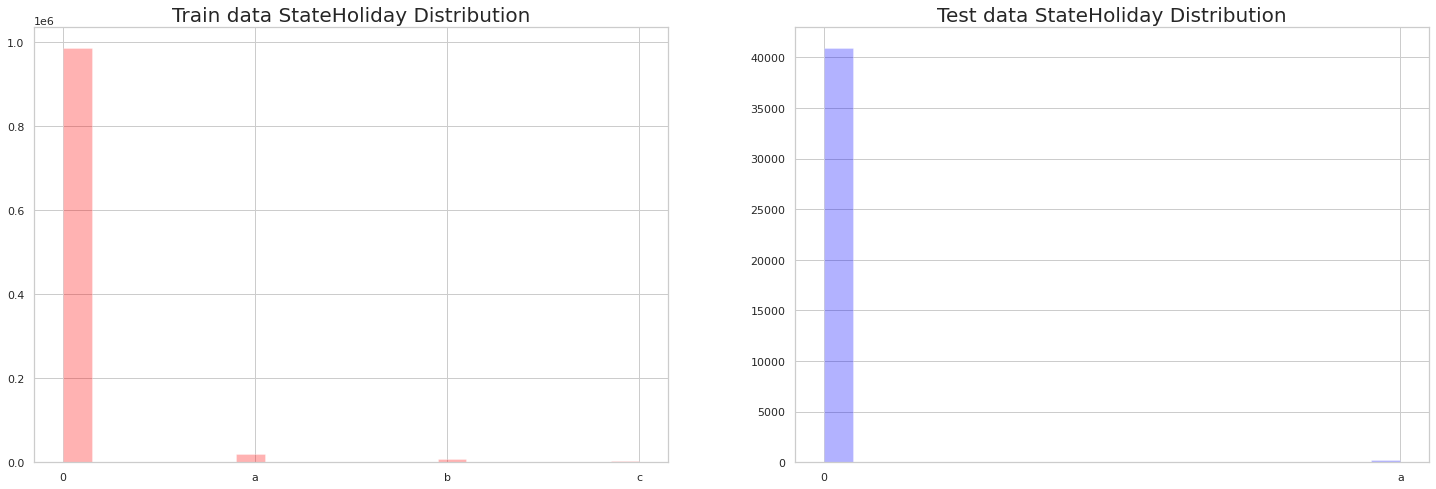

In [36]:
# Sales during, before and after StateHoliday
plot.plot_subplots(train_df['StateHoliday'], test_df['StateHoliday'], 'Train data StateHoliday Distribution', 'Test data StateHoliday Distribution')


<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

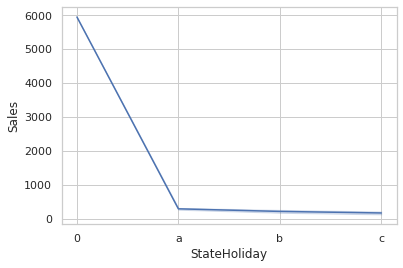

In [37]:
# Using line chart plot sales during, before and after StateHoliday
sns.lineplot(x='StateHoliday', y='Sales', data=train_df)

##### What can you say about the correlation between sales and number of customers?

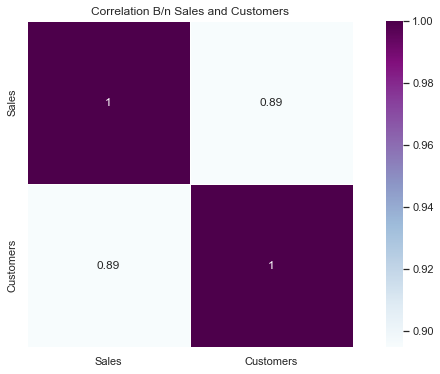

In [116]:
plot.heatmap(train_df[['Sales', 'Customers']], title='Correlation B/n Sales and Customers')

Insight -> There is a high correlation b/n Sales and Customers. The more customers the more sales

Seasonal begavior of the data

In [38]:
# Check & compare sales behavior before, during and after holidays
holiday_df = train_df.groupby(['StateHoliday'])['Sales'].mean().reset_index()
holiday_df.head()

,StateHoliday,Sales
0,0,5947.483893
1,a,290.735686
2,b,214.311510
3,c,168.733171


In [39]:
# Rename StateHoliday values
holiday_df.replace({'StateHoliday': {'0': 'No Holiday', 'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas'}}, inplace=True)

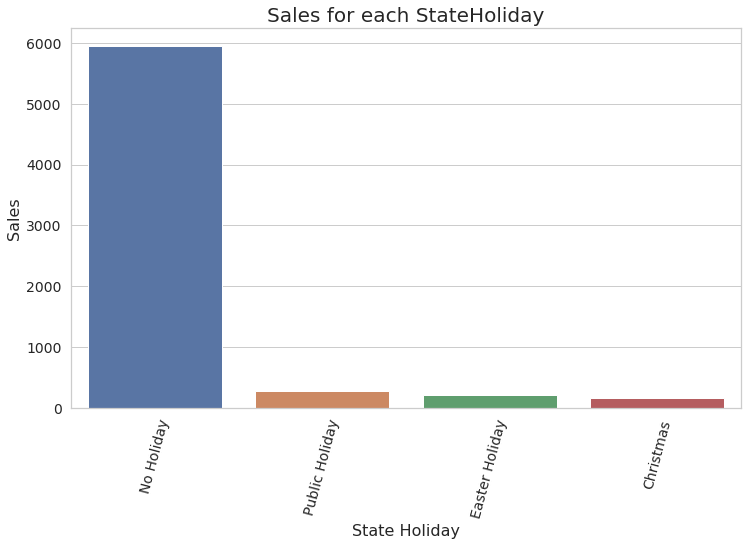

In [40]:
plot.plot_bar(holiday_df, 'StateHoliday', 'Sales', 'Sales for each StateHoliday', 'State Holiday', 'Sales')

There is a very low purchase frequency during holidays

Sales on School holidays

In [29]:
school_holiday = train_df.replace({'SchoolHoliday': {0: 'No Holiday', 1: 'School Holiday'}})

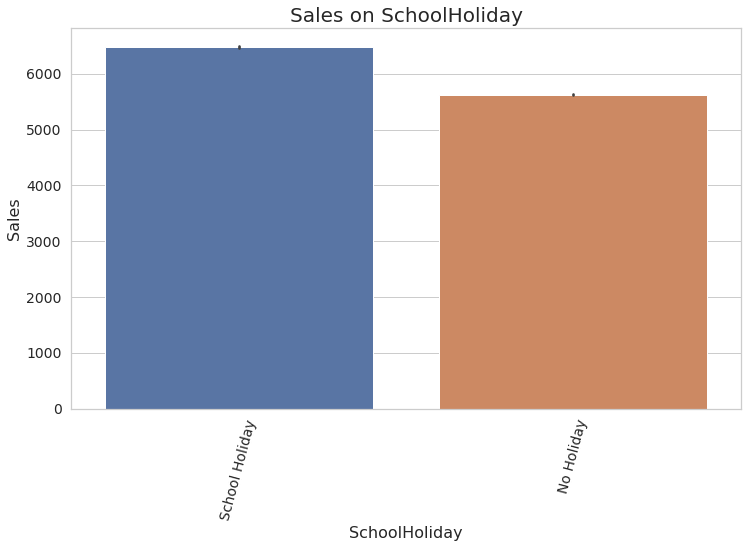

In [30]:
plot.plot_bar(school_holiday, 'SchoolHoliday', 'Sales', 'Sales on SchoolHoliday', 'SchoolHoliday', 'Sales')

>> ##### Total Sales by year

In [31]:
year_df = train_df.groupby(['Year'])['Sales'].mean().reset_index()
year_df

,Year,Sales
0,2013,5658.533675
1,2014,5833.290704
2,2015,5878.245380


<AxesSubplot:xlabel='Year', ylabel='Sales'>

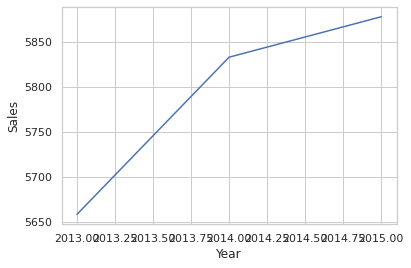

In [32]:
sns.lineplot(x='Year', y='Sales', data=year_df)

Purchasing behavior

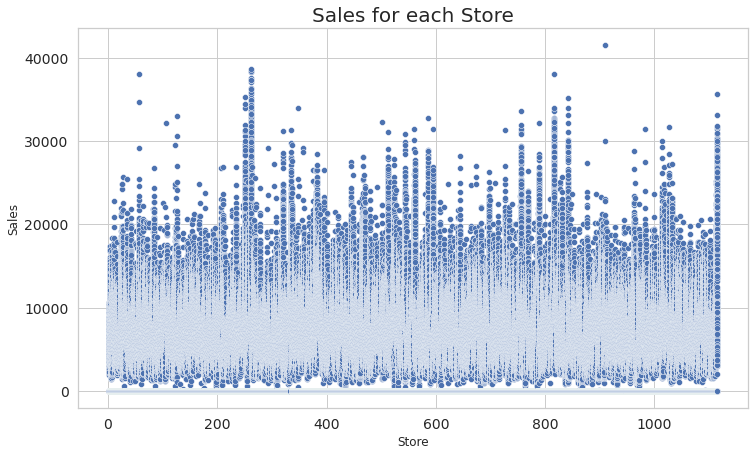

In [33]:
plot.plot_scatter(train_df, train_df['Store'], train_df['Sales'], 'Sales for each Store', None, None)

It can be seen that there are some outliers in the training

<Figure size 864x504 with 0 Axes>

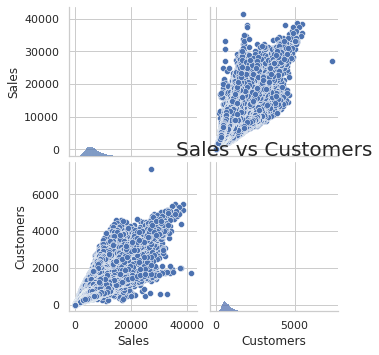

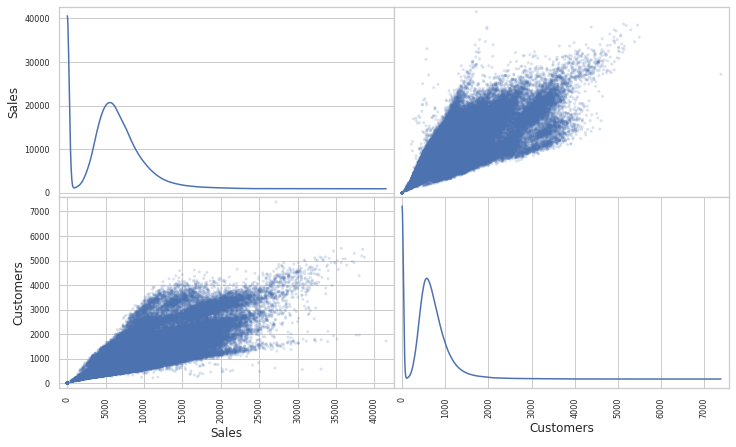

In [41]:
#Sales_Customers
attributes = ["Sales", "Customers"]
plot.sc_matrix(train_df[attributes], "Sales vs Customers")

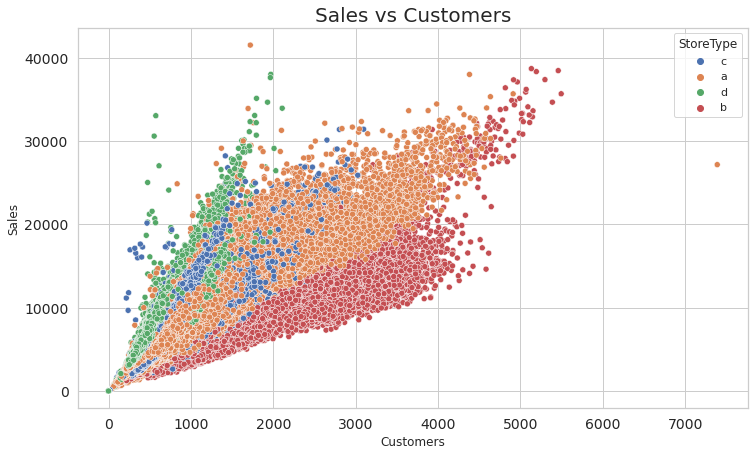

In [42]:
plot.plot_scatter(train_df[attributes], train_df['Customers'], train_df['Sales'], 'Sales vs Customers', train_df['StoreType'], None)

It can be clearly seen that there is a positive correlation between the number of sales and the number of customers

>> Sales based on assortment type

[]

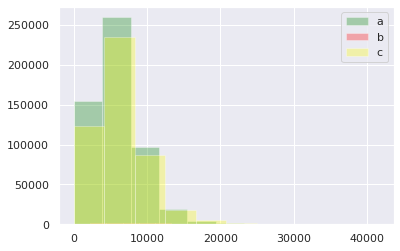

In [ ]:
#Sales_Assortment
sns.set()
plt.hist(train_df[train_df['Assortment'] == 'a'].Sales, color='green', alpha=0.3, label = 'a')
plt.hist(train_df[train_df['Assortment'] == 'b'].Sales, color='red', alpha=0.3, label = 'b')
plt.hist(train_df[train_df['Assortment'] == 'c'].Sales, color='yellow', alpha=0.3, label = 'c')
plt.legend()
plt.plot()

Assortment A stores has high sales, b has the lowest

Plot the Sales vs. CompetitionDistance

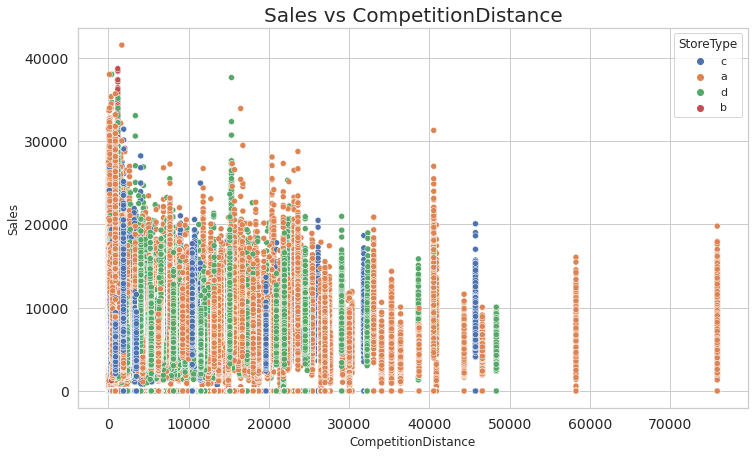

In [ ]:
attributes = ["Sales", "CompetitionDistance"]
plot.plot_scatter(train_df[attributes], train_df['CompetitionDistance'], train_df['Sales'], 'Sales vs CompetitionDistance', train_df['StoreType'], None)

<Figure size 864x504 with 0 Axes>

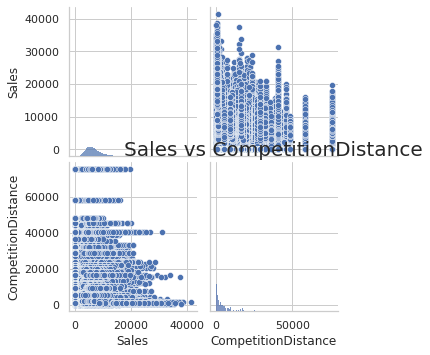

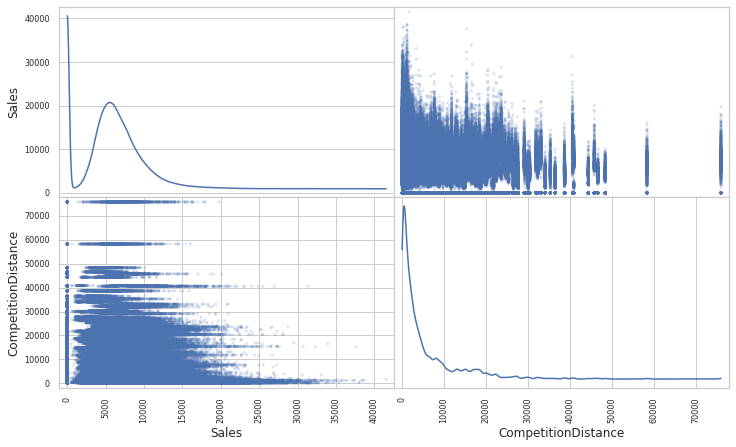

In [30]:
plot.sc_matrix(train_df[attributes], "Sales vs CompetitionDistance")

Interestingly, as the competition distance increases, the sales decreases. There are some sales for store type A as the competition distance is very high.

>> Sales bahavior when closed and open

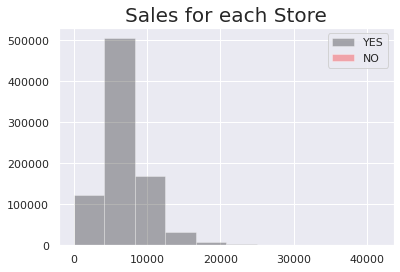

In [31]:
plot.plot_hist_2d(train_df[train_df['Open'] == 1], train_df[train_df['Open'] == 0], 'Sales', 'Sales', 'Sales for each Store', 'YES', 'NO')

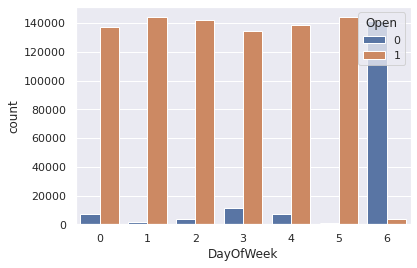

In [110]:
#Open_DayOfWeek
sns.countplot( x='DayOfWeek', data=train_df, hue="Open", palette="deep");

<AxesSubplot:>

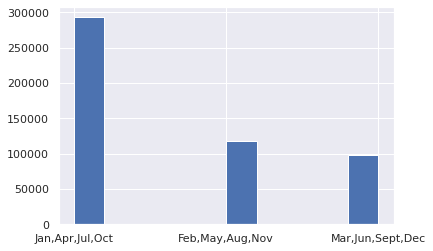

In [111]:
train_df['PromoInterval'].hist()


There is no sale when the store is closed

In [80]:
train_df['DayOfWeek'].unique()

array([4, 3, 2, 1, 0, 6, 5])

In [79]:
train_df.columns
tdf = train_df.query('DayOfWeek > 0 and DayOfWeek < 6')

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day'],
      dtype='object')

In [81]:
# Check for stores that are open during weekdays
open_stores = train_df.query('Open == 1 and DayOfWeek > 0 and DayOfWeek < 6')

In [92]:
open_stores.groupby(['DayOfWeek'])['Sales'].mean().reset_index()

,DayOfWeek,Sales
0,1,7088.113656
1,2,6728.122978
2,3,6767.310159
3,4,7072.677012
4,5,5874.840238


In [93]:
open_stores.groupby(['DayOfWeek'])['Customers'].mean().reset_index()

,DayOfWeek,Customers
0,1,769.986753
1,2,740.598876
2,3,755.569784
3,4,781.771639
4,5,660.177526


In [94]:
# Check for stores that are open during weekends
weekend_stores = train_df.query('Open == 1 and (DayOfWeek > 5 or DayOfWeek < 1)')
weekend_stores.groupby(['DayOfWeek'])['Sales'].mean().reset_index()

,DayOfWeek,Sales
0,0,8216.073074
1,6,8224.723908


In [95]:
weekend_stores.groupby(['DayOfWeek'])['Customers'].mean().reset_index()

,DayOfWeek,Customers
0,0,855.444984
1,6,1441.532424


It can be seen that there is a big difference in sales during the week time and the weekend

>> Sales bahavior based on Promos

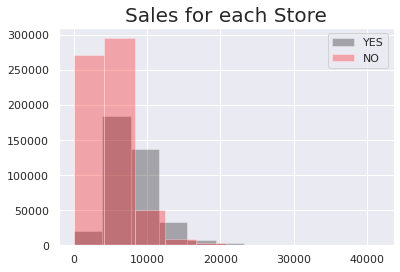

In [32]:
#Sales_Promo
plot.plot_hist_2d(train_df[train_df['Promo'] == 1], train_df[train_df['Promo'] == 0], 'Sales', 'Sales', 'Sales for each Store', 'YES', 'NO')

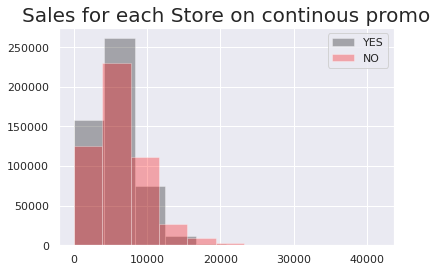

In [34]:
plot.plot_hist_2d(train_df[train_df['Promo2'] == 1], train_df[train_df['Promo2'] == 0], 'Sales', 'Sales', 'Sales for each Store on continous promo', 'YES', 'NO')


Stores with continuous Promo seems to have better sales than sales with one time promo

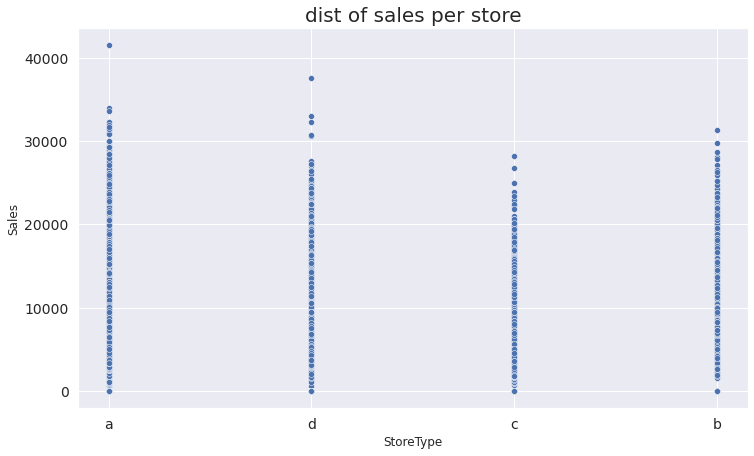

In [38]:
promos_2 = train_df[train_df['Promo2'] == 1]
plot.plot_scatter(promos_2, 'StoreType', 'Sales', 'dist of sales per store', None , None)

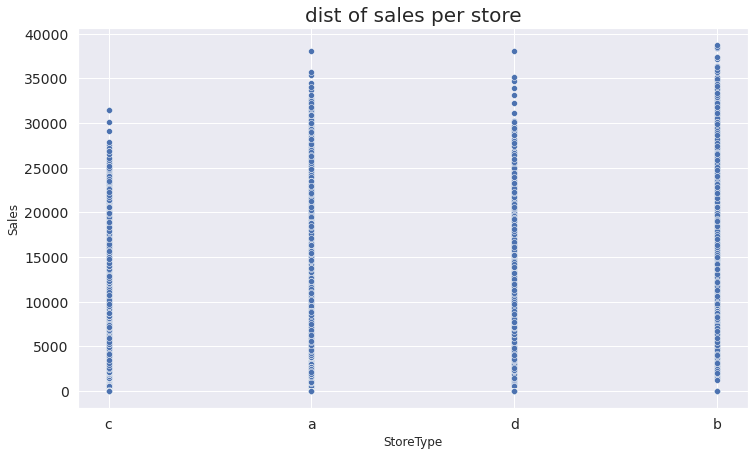

In [39]:
promos_2 = train_df[train_df['Promo2'] == 0]
plot.plot_scatter(promos_2, 'StoreType', 'Sales', 'dist of sales per store', None , None)

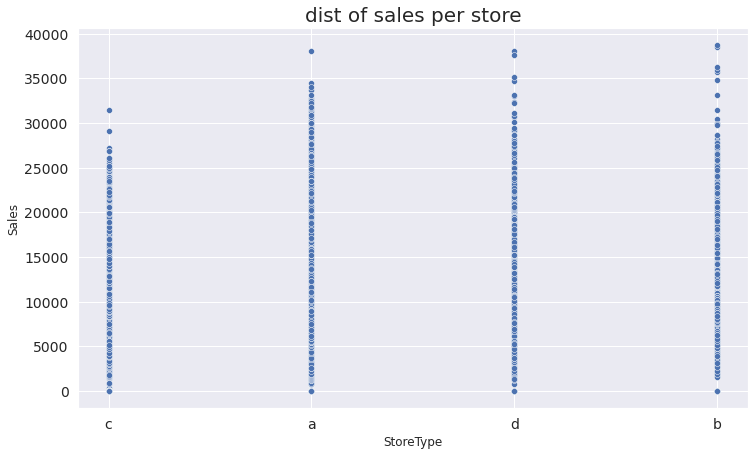

In [41]:
promos_1 = train_df[train_df['Promo'] == 1]
plot.plot_scatter(promos_1, 'StoreType', 'Sales', 'dist of sales per store', None , None)

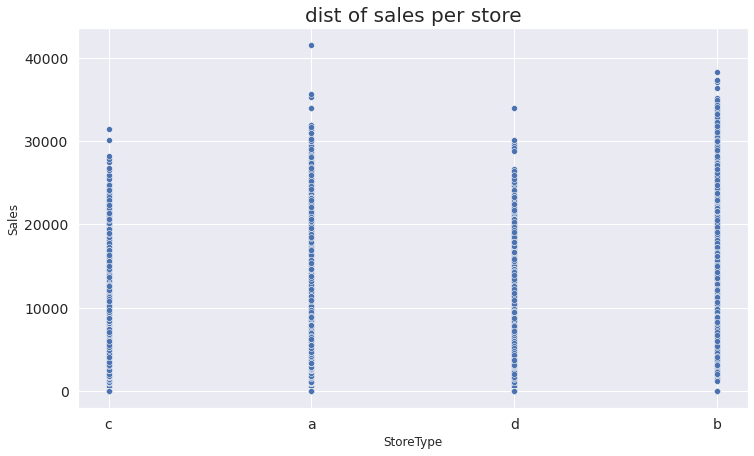

In [42]:
promos_1 = train_df[train_df['Promo'] == 0]
plot.plot_scatter(promos_1, 'StoreType', 'Sales', 'dist of sales per store', None , None)

If Promos could be deployed on StoreType D, it would be more effective

Plot the Sales vs. CompetitionDistance

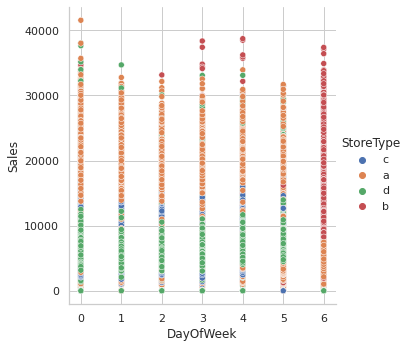

In [102]:
sns.relplot(x="DayOfWeek", y="Sales", hue="StoreType", data=train_df);

Store B is mostly open on Saturday and has a higher amount of Sales

>> Sales Distribution Per Month

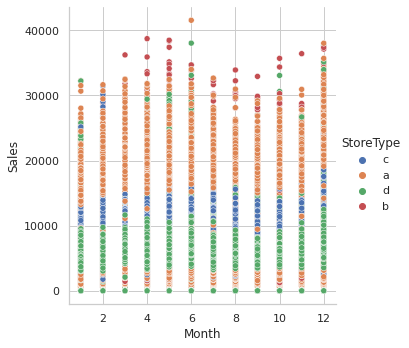

In [104]:
sns.relplot(x="Month", y="Sales", hue="StoreType", data=train_df);

June has the highest amount of sale, January has the lowest 

>> Sales per each StoreType

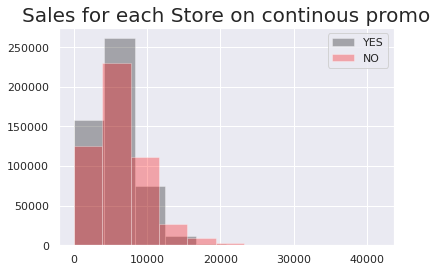

In [105]:
plot.plot_hist_2d(train_df[train_df['Promo2'] == 1], train_df[train_df['Promo2'] == 0], 'Sales', 'Sales', 'Sales for each Store on continous promo', 'YES', 'NO')


Stores with continuous Promo seems to have better sales than sales with one time promo

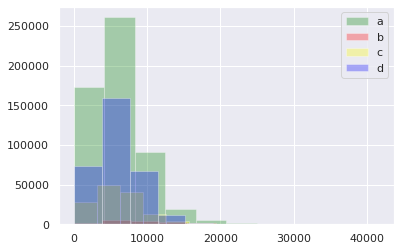

In [38]:
#Sales_StoreType
sns.set()
plt.hist(train_df[train_df['StoreType'] == 'a'].Sales, color='green', alpha=0.3, label = 'a')
plt.hist(train_df[train_df['StoreType'] == 'b'].Sales, color='red', alpha=0.3, label = 'b')
plt.hist(train_df[train_df['StoreType'] == 'c'].Sales, color='yellow', alpha=0.3, label = 'c')
plt.hist(train_df[train_df['StoreType'] == 'd'].Sales, color='blue', alpha=0.3, label = 'd')
plt.legend()
plt.plot()

Store A has the greatest amount of Sales while B has the lowest

#### Conclusions of EDA:
* The most selling and crowded store type is A.
*  Sales is highly correlated to number of Customers.
* For all stores, Promotion leads to increase in Sales and Customers both.
* The stores which are opened during School Holiday have more sales than normal days.
* More stores are opened during School holidays than State holidays.
* Sales are increased during Chirstmas week, this might be due to the fact that people buy more beauty products during a   Christmas celebration.
* Absence of values in features CompetitionOpenSinceYear/Month doesn’t indicate the absence of competition as CompetitionDistance values are not null where the other two values are null.
* After analysing sales using Fourier decomposition, I found that there’s a little seasonality component in the Sales data.